# 1. 차원 축소(Dimension Reduction) 개요
- 차원 축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 피처 선택(feture selection) - 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
- 피처 추출(feature extraction) - 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것. 기존의 피처와는 완전히 다른 값. 잠재적인 요소를 추출
- 활용 분야: 매우 많은 픽셀로 이루어진 이미지 데이터, 텍스트 문서의 숨겨진 의미 추출

# 2. PCA(Principal Conponent Analysis)
- 여러 변수 간 존재하는 상관관계를 이용해 이를 대표하는 주성분(principal component)을 추출해 차원을 축소하는 기법
- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소 - 주성분
- PCA 수행 단계
  1. 입력 데이터 세트의 공분산 행렬을 생성
  2. 공분산 행렬의 고유벡터와 고유값을 계산
  3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼) 고유벡터를 추출
  4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다는 Dataframe으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


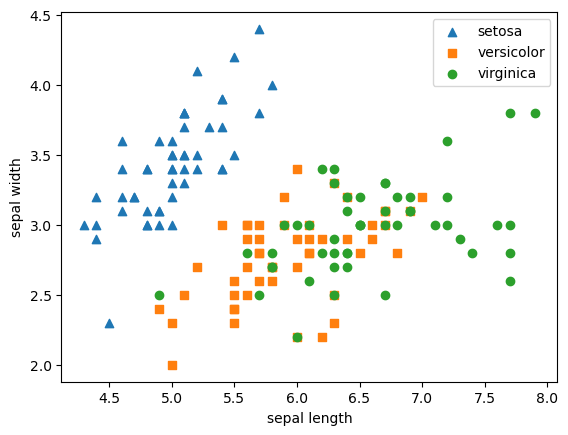

In [4]:
# 2차원 시각화
markers = ['^','s','o']

# target 값 setosa=0, versicolor=1, virginica=2
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [7]:
# PCA 데이터로 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #PCA로 변환할 차원의 수

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


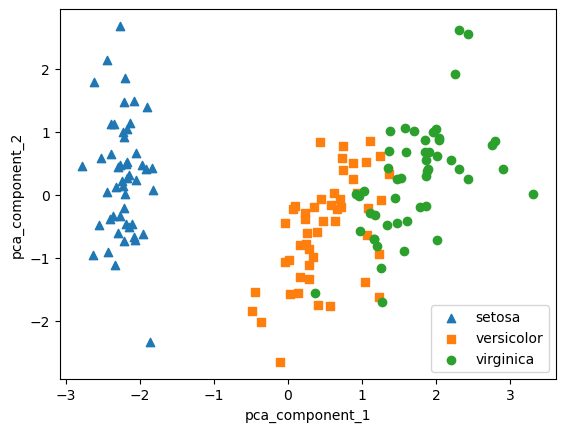

In [9]:
# 시각화
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [13]:
#전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


-> PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [16]:
# PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


# 3. LDA(Linear Discriminant Analysis)
- 선형 판별 분석법
- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법
- 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소
- 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
- 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소
- LDA 구하는 단계
   1. 클래스 내부와 클래스 간 분산 행렬을 구함
   2. 다음 식으로 두 행렬을 고유벡터로 분해
   3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출
   4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

## 붓꽃 데이터 세트에 LDA 적용하기

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [18]:
# LDA는 지도학습이므로 클래스의 결정값이 변환 시에 필요
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


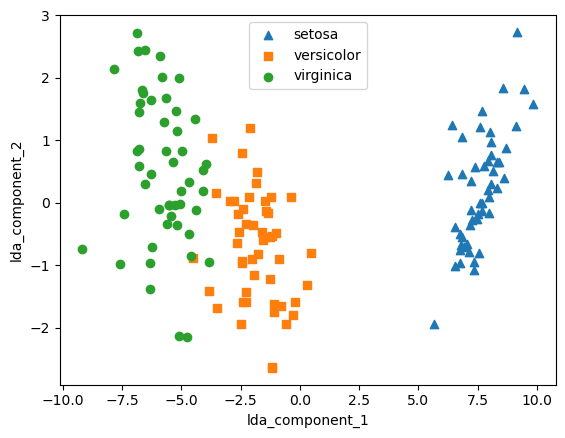

In [19]:
lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

# 시각화
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# 4. SVD(Singular Value Decomposition)
- SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음
- 특이값 분해

In [21]:
#넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4*4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))


[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [22]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [23]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


-> 동일하게 복원됨

## 사이킷런 TruncatedSVD 클래스를 이용한 변환


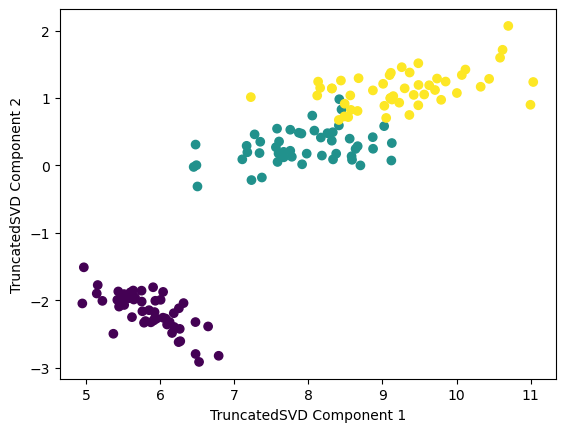

In [27]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
#2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

# 5. NMF(Non-Negative Matrix Factorization)
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형
- 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 간단하게 두 개의 기반 양수 행렬로 분해

C:\Users\suhsu\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


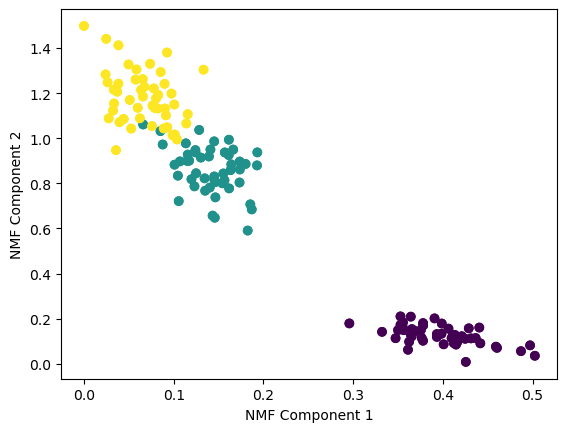

In [31]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()

- SVD와 유사하게 이미지 압축을 통한 패턴인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됨. 영화 추천 등